# Run the whole deltas algorithm

In [997]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

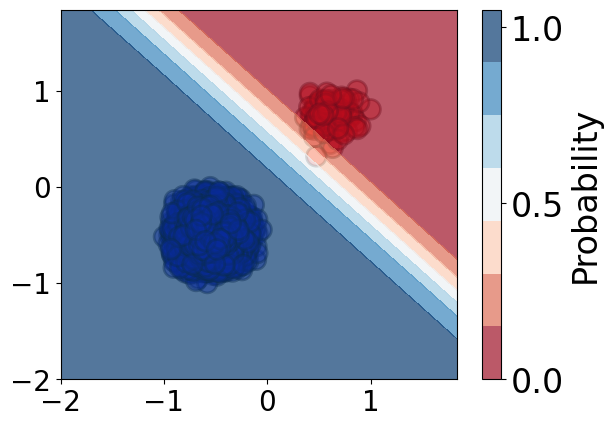

In [998]:
N1 = 10000
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.5066757616795905
R2 empirical: 0.4111002640162066


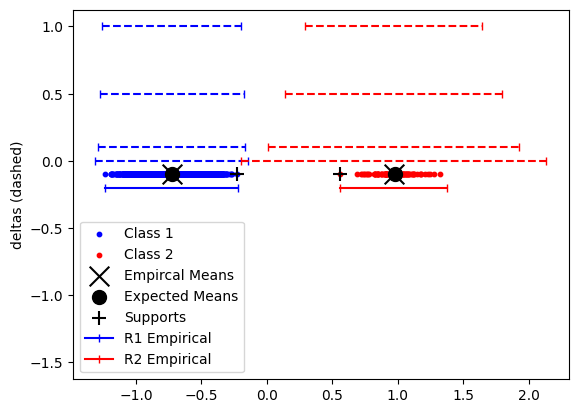

In [999]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [1000]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline.print_params(data_info)

Parameters
        R:  1.3222912209959023
        N1: 10000
        N2: 10000
        R1: 0.5066757616795905
        R2: 0.4111002640162066
        M:  0.7829134095969398
        D:  1.694721835406733
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.7616780798636362]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.014014014014014997 
    delta2: 0.9054397582714048
    constraint satisfied: False


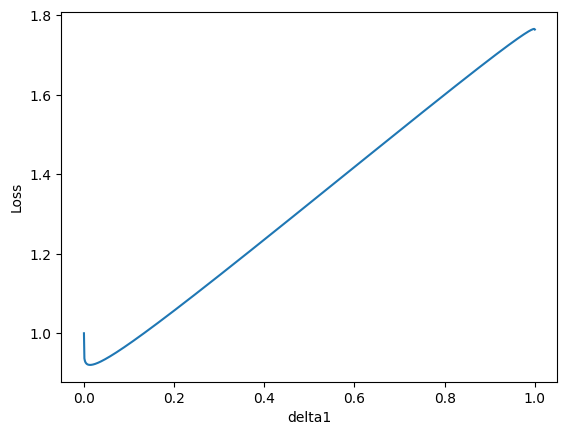

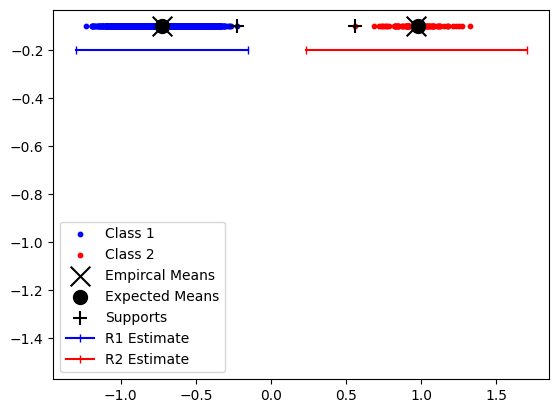

In [1001]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

In [1002]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)

original accuracy: 0.99995
deltas   accuracy: 1.0


# test is delta 2 given delta 1 equation satifies the contraint

In [1003]:
delta1 = delta1
delta1 = 1
# delta2 = delta1_from_delta2_func(delta1, data_info)
delta2 = deltas.delta2_given_delta1_matt(delta1, data_info)

print(delta1)
print(delta2)
print(contraint_func(delta1, delta2, data_info))
print(deltas.eq7_matt(delta1, delta2, data_info))

1
0.7616780798636362
-0.38847290485546804
2.220446049250313e-16
